In [1]:
import numpy as np

c_light = 2.99792458E8 #m/s

import matplotlib.pyplot as plt
%matplotlib nbagg
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [2]:
def rA_delphes(rh, xc, yc):
    rc = np.hypot(xc, yc)
    
    xd = xc**3 - xc*abs(rh)*rc + xc*yc**2
    xd /= rc**2
    
    yd = yc*(-abs(rh)*rc + rc**2)/rc**2
    
    return [xd, yd]

In [3]:
def rA_kevin(rh, xc, yc):
    rc = np.hypot(xc, yc)
    
    xd = xc*(1-abs(rh/rc))
    
    yd = yc*(1-abs(rh/rc))
    
    return [xd, yd]

In [19]:
def rA_olmo(rh, xc, yc, phi_0, omega, z_0, beta_z):
    rc = np.hypot(xc, yc)
    
    t_a = (phi_0 - np.arctan(-xc/yc))/omega
#     print 't_a raw =', t_a
    pio = np.abs(np.pi/omega)
#     print 'pi/omega = ', pio
    N=0
    while abs(t_a) > 0.5*pio:
        t_a -= np.sign(t_a)*pio
        N+=1
        if N>5: break
#     print 'N = ', N
        
    xd = xc - rh*np.sin(phi_0 - omega*t_a)
    yd = yc + rh*np.cos(phi_0 - omega*t_a)
    zd = z_0 + c_light*beta_z*t_a
    
    return [xd, yd, zd, t_a]

In [5]:
def compute_d0(x0, y0, phi_0):
    return x0*np.sin(phi_0) - y0*np.cos(phi_0)

def compute_dz(r_0, p_0):
    dz = r_0[2] - (r_0[0]*p_0[0] + r_0[1]*p_0[1])*p_0[2]/(p_0[0]**2+p_0[1]**2)
    return dz

Closest approach check

phi_0 =  29.6281173769
pt = 2.29333285163
pz = 1.79478155925
q = -1
r_0 = [ 0.00023589 -0.00093389 -0.06595792]
[0.00045906810975998954, -0.00080694391947325184]
[0.00045906810976001171, -0.0008069439194732822]
t_a raw = 1.14257715098e-12
pi/omega =  2.81431999145e-08
N =  0
[0.00045906810975993029, -0.00080694391947333521, -0.065756979325154966, 1.1425771509788268e-12]
d0 =  0.000928403149371
d0 =  0.000928386782852
d0 =  0.000928386782852
-0.0657570719949 -0.0657569793252


<IPython.core.display.Javascript object>


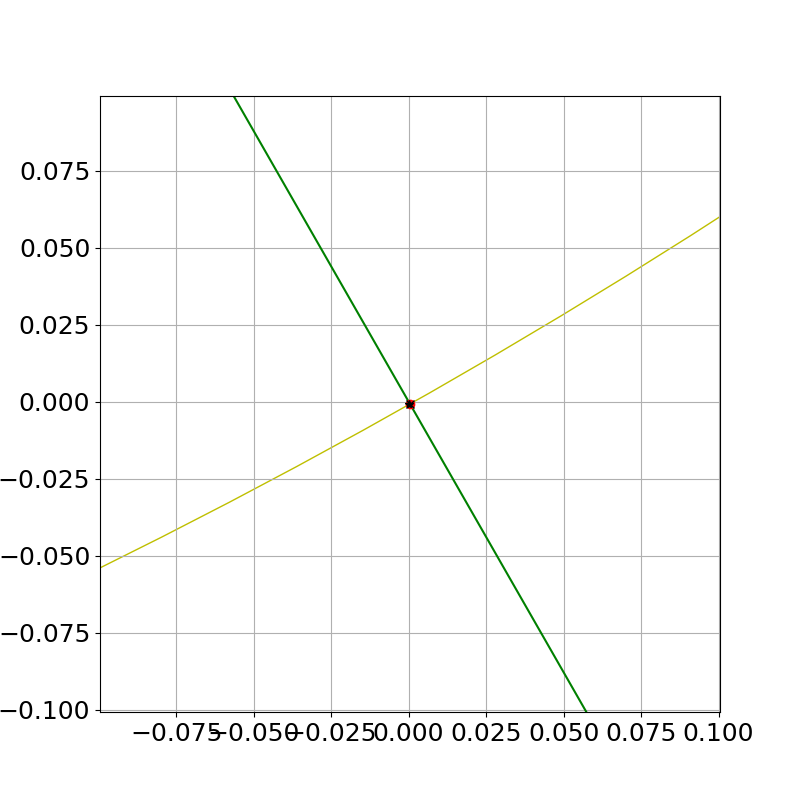

In [6]:
Bz = 3.8
p_0 = 0.2*np.random.uniform(5,10, size=3)
r_0 = 1*np.random.normal(scale=(0.001, 0.001, 0.05))
phi_0 = np.arctan2(p_0[1], p_0[0])
e = np.sqrt(0.938**2 + np.dot(p_0,p_0))
pt = np.hypot(p_0[0], p_0[1])
beta = p_0/e
print 'phi_0 = ', phi_0*180/np.pi
print 'pt =', pt
print 'pz =', p_0[2]
q = 1-2*np.random.randint(0,2)
print 'q =', q
print 'r_0 =', r_0

gammam = e*1.0E9 / (c_light*c_light)
omega = q*Bz / (gammam)

rh = pt / (q * Bz) * 1.0E9/c_light

xc = r_0[0] + rh*np.sin(phi_0)
yc = r_0[1] - rh*np.cos(phi_0)

rad = rA_delphes(rh, xc, yc)
print rad
rak = rA_kevin(rh, xc, yc)
print rak
rao = rA_olmo(rh, xc, yc, phi_0, omega, r_0[2], beta[2])
print rao

p_A = np.array([pt*np.cos(phi_0-omega*rao[3]), pt*np.sin(phi_0-omega*rao[3]), p_0[2]])

d0 = compute_d0(r_0[0], r_0[1], phi_0)
d0_A =  compute_d0(rao[0], rao[1], phi_0-omega*rao[3])
d0_o = np.sign(rao[0]*p_A[1]-rao[1]*p_A[0])*np.hypot(rao[0], rao[1])
print 'd0 = ', d0
print 'd0 = ', d0_A
print 'd0 = ', d0_o

dz = compute_dz(r_0, p_0)
print dz, rao[2]

circ = plt.Circle((xc, yc), abs(rh), color='y', fill=False)

fig = plt.figure(figsize=(8,8))
fig = plt.gcf()
ax = fig.gca()

plt.plot([-xc,xc], [-yc,yc],'g')
ax.plot(xc,yc, 'ok')
ax.plot(rao[0], rao[1], '+b')
ax.plot(rak[0], rak[1], 'or')
ax.plot(rad[0], rad[1], 'xk')

ax.plot(r_0[0], r_0[1], '*k')
ax.add_artist(circ)

plt.xlim(rao[0]-0.1, rao[0]+0.1)
plt.ylim(rao[1]-0.1, rao[1]+0.1)
# plt.xlim(-2,2)
# plt.ylim(-2,2)
plt.grid()

plt.show()

Detector impact check

In [13]:
def compute_impact_point(td, R, rh, rc, omega, beta_z, phi_0, z_0):
    alpha = -(R**2 - rh**2 - rc**2)/(2*np.abs(rh)*rc)
    alpha = np.abs(np.arccos(alpha))
    
    ti = td + alpha/np.abs(omega)
    
    xi = xc - rh*np.sin(phi_0 - omega*ti)
    yi = yc + rh*np.cos(phi_0 - omega*ti)
    zi = z_0 + c_light*beta_z*ti
    
    return [xi, yi, zi, ti]

In [16]:
np.min([1,0.5,4])

0.5

In [18]:
def compute_impact_point_Delphes(td, R, rh, rc, omega, beta_z, phi_0, z_0, phi_c):
    asinrho = np.arcsin((R**2 - rh**2 - rc**2) / (2*np.abs(rh)*rc))
    delta = phi_0 - phi_c
    if(delta <-np.pi): delta += 2*np.pi
    if(delta > np.pi): delta -= 2*np.pi
    t1 = (delta + asinrho) / omega
    t2 = (delta + np.pi - asinrho) / omega
    t3 = (delta + np.pi + asinrho) / omega
    t4 = (delta - asinrho) / omega
    t5 = (delta - np.pi - asinrho) / omega
    t6 = (delta - np.pi + asinrho) / omega

    if(t1 < 0.0): t1 = 1.0E99
    if(t2 < 0.0): t2 = 1.0E99
    if(t3 < 0.0): t3 = 1.0E99
    if(t4 < 0.0): t4 = 1.0E99
    if(t5 < 0.0): t5 = 1.0E99
    if(t6 < 0.0): t6 = 1.0E99
                        
    ti = np.min([t1, t2, t3, t4, t5, t6])

    xi = xc - rh*np.sin(phi_0 - omega*ti)
    yi = yc + rh*np.cos(phi_0 - omega*ti)
    zi = z_0 + c_light*beta_z*ti
    
    return [xi, yi, zi, ti]

phi_0 =  56.7798986257
pt = 2.24911369539
pz = 1.37447062444
q = -1
r_0 = [ -1.11141738e-03   8.31061779e-06   4.82866112e-02]
Minimum time to reach the barrel =  1.2443440349e-08
[-0.83885175701151049, 2.8803346558618328, 2.1303394342401711, 1.4136693278502829e-08]
[-0.33016551540090222, 2.547426224597507, 1.7573341785299128, 1.1604067384968824e-08]


<IPython.core.display.Javascript object>


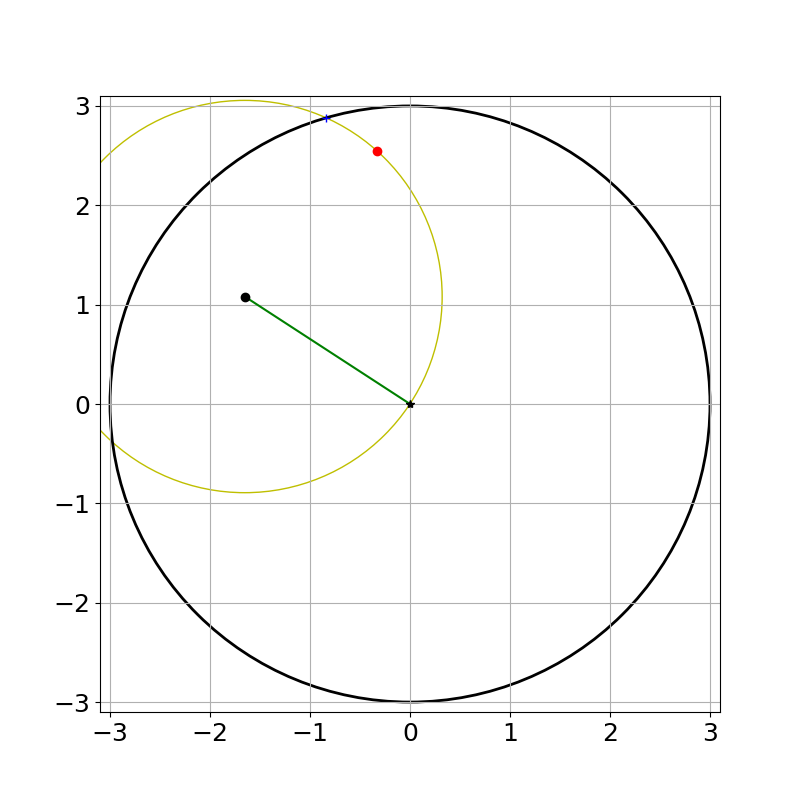

In [34]:
Bz = 3.8; R_det = 3
p_0 = 0.2*np.random.uniform(5,10, size=3)
r_0 = 1*np.random.normal(scale=(0.001, 0.001, 0.05))
phi_0 = np.arctan2(p_0[1], p_0[0])
e = np.sqrt(0.938**2 + np.dot(p_0,p_0))
pt = np.hypot(p_0[0], p_0[1])
beta = p_0/e
print 'phi_0 = ', phi_0*180/np.pi
print 'pt =', pt
print 'pz =', p_0[2]
q = 1-2*np.random.randint(0,2)
print 'q =', q
print 'r_0 =', r_0

tfrom_barrel = (R_det - np.hypot(r_0[0], r_0[1]))/(c_light*pt/e)
print "Minimum time to reach the barrel = ", tfrom_barrel

gammam = e*1.0E9 / (c_light*c_light)
omega = q*Bz / (gammam)

rh = pt / (q * Bz) * 1.0E9/c_light

xc = r_0[0] + rh*np.sin(phi_0)
yc = r_0[1] - rh*np.cos(phi_0)
rc = np.hypot(xc, yc)
phi_c = np.arctan(yc/xc)
if(xc < 0.0): phi_c -= np.sign(phi_c)*np.pi

rao = rA_olmo(rh, xc, yc, phi_0, omega, r_0[2], beta[2])
p_A = np.array([pt*np.cos(phi_0-omega*rao[3]), pt*np.sin(phi_0-omega*rao[3]), p_0[2]])
d0 = compute_d0(r_0[0], r_0[1], phi_0)
dz = compute_dz(r_0, p_0)

rio = compute_impact_point(rao[3], R_det, rh, rc, omega, beta[2], phi_0, r_0[2])
print rio

riD = compute_impact_point_Delphes(rao[3], R_det, rh, rc, omega, beta[2], phi_0, r_0[2], phi_c)
print riD

circ = plt.Circle((xc, yc), abs(rh), color='y', fill=False)
det = plt.Circle((0, 0), R_det, color='K', fill=False, lw=2)

fig = plt.figure(figsize=(8,8))
fig = plt.gcf()
ax = fig.gca()

plt.plot([0,xc], [0,yc],'g')
ax.plot(xc,yc, 'ok')
ax.plot(riD[0], riD[1], 'or')
ax.plot(rio[0], rio[1], '+b')

ax.plot(r_0[0], r_0[1], '*k')
ax.add_artist(circ)
ax.add_artist(det)

plt.xlim(-R_det-0.1, R_det+0.1)
plt.ylim(-R_det-0.1, R_det+0.1)
plt.grid()

plt.show()